#Create a new dataset with only common columns

In [1]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, balanced_accuracy_score, confusion_matrix

from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


MessageError: Error: credential propagation was unsuccessful

#show Data

In [55]:
df=pd.read_csv("/content/drive/MyDrive/IoT Dataset 2024/two-dataset only /iot-DIAD/IoTDIAD.csv")
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,192.168.137.66-192.168.137.174-41082-80-6,192.168.137.66,41082.0,192.168.137.174,80.0,6.0,09/08/2022 11:27:38 AM,1527173.0,16.0,1.0,...,20.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000,0.0,0.0,DoS
1,192.168.137.66-192.168.137.254-55598-34287-6,192.168.137.66,55598.0,192.168.137.254,34287.0,6.0,09/08/2022 11:56:16 AM,9912071.0,7.0,2.0,...,32.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000,0.0,0.0,DoS
2,192.168.137.174-192.168.137.66-80-47994-6,192.168.137.174,80.0,192.168.137.66,47994.0,6.0,09/08/2022 11:29:10 AM,0.0,2.0,0.0,...,20.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000,0.0,0.0,DoS
3,192.168.137.66-192.168.137.254-59336-8009-6,192.168.137.66,59336.0,192.168.137.254,8009.0,6.0,09/08/2022 11:50:16 AM,349868.0,1.0,1.0,...,40.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000,0.0,0.0,DoS
4,192.168.137.66-192.168.137.254-55662-8009-6,192.168.137.66,55662.0,192.168.137.254,8009.0,6.0,09/08/2022 11:49:16 AM,215841.0,1.0,1.0,...,40.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000,0.0,0.0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33613,192.168.137.79-255.255.255.255-49154-6667-17,192.168.137.79,49154.0,255.255.255.255,6667.0,17.0,07/10/2022 03:06:15 PM,119995219.0,25.0,0.0,...,8.0,1.165906e+07,6.061784e+06,19997148.0,4965723.0,5006391.25,13272.949739,5038906.0,5000281.0,BenignTraffic
33614,157.249.81.141-192.168.137.41-80-51746-6,157.249.81.141,80.0,192.168.137.41,51746.0,6.0,07/10/2022 06:00:51 PM,126325.0,4.0,0.0,...,32.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000,0.0,0.0,BenignTraffic
33615,192.168.137.186-192.168.137.1-42090-53-17,192.168.137.186,42090.0,192.168.137.1,53.0,17.0,07/10/2022 05:16:07 PM,85450.0,2.0,2.0,...,8.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000,0.0,0.0,BenignTraffic
33616,205.174.165.69-192.168.137.187-24421-63908-17,205.174.165.69,24421.0,192.168.137.187,63908.0,17.0,07/10/2022 09:11:08 PM,1115118.0,7.0,0.0,...,8.0,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000,0.0,0.0,BenignTraffic


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33618 entries, 0 to 33617
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     33618 non-null  object 
 1   Src IP                      33618 non-null  object 
 2   Src Port                    33618 non-null  float64
 3   Dst IP                      33618 non-null  object 
 4   Dst Port                    33618 non-null  float64
 5   Protocol                    33618 non-null  float64
 6   Timestamp                   33618 non-null  object 
 7   Flow Duration               33618 non-null  float64
 8   Total Fwd Packet            33618 non-null  float64
 9   Total Bwd packets           33618 non-null  float64
 10  Total Length of Fwd Packet  33618 non-null  float64
 11  Total Length of Bwd Packet  33618 non-null  float64
 12  Fwd Packet Length Max       33618 non-null  float64
 13  Fwd Packet Length Min       336

In [57]:
df.shape[1]

84

In [58]:
df['label'].unique()

array(['DoS', 'Mirai', 'Recon', 'Spoofing', 'Web-based', 'Brute_Force',
       'DDoS', 'BenignTraffic'], dtype=object)

In [59]:
print(df['label'].value_counts())

label
BenignTraffic    6000
DoS              4000
Mirai            4000
Recon            4000
Spoofing         4000
Web-based        4000
DDoS             4000
Brute_Force      3618
Name: count, dtype: int64


<ipython-input-9-1acc49054848>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="label", palette=palette)


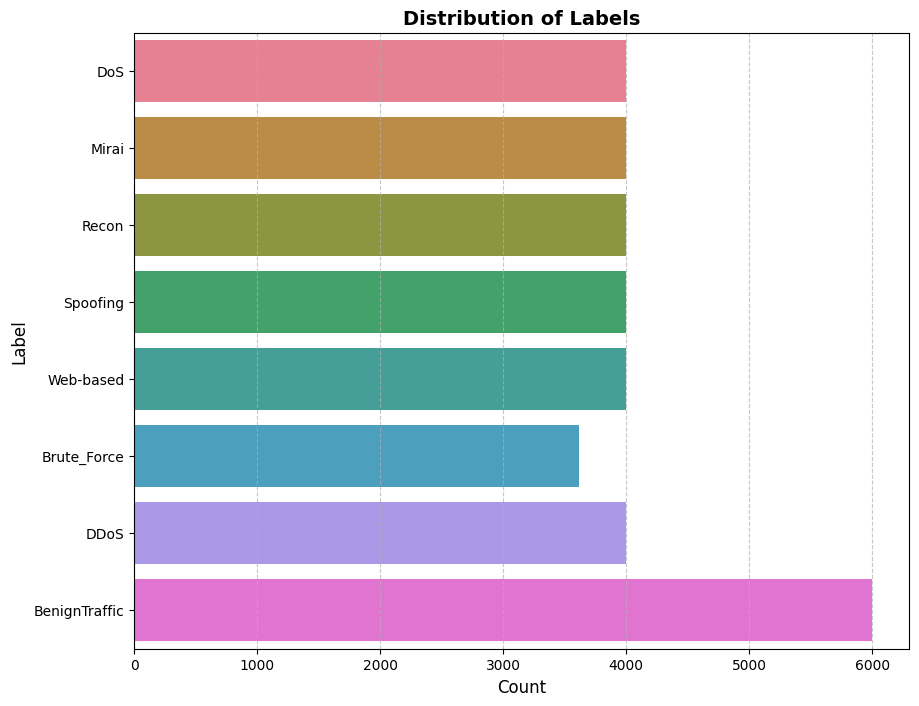

In [60]:
# Set figure size
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

unique_labels = df["label"].unique()
palette = sns.color_palette("husl", len(unique_labels))

# Plot label distribution (horizontal)
sns.countplot(data=df, y="label", palette=palette)

# Add title and labels
plt.title("Distribution of Labels", fontsize=14, fontweight="bold")
plt.ylabel("Label", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

# pre-processing




In [61]:
from sklearn.preprocessing import LabelEncoder

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
df["Minute"] = df["Timestamp"].dt.minute
df["Second"] = df["Timestamp"].dt.second

df.drop(columns=["Timestamp"], inplace=True)

label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

df["Flow ID"] = df["Flow ID"].astype("category").cat.codes
df["Src IP"] = df["Src IP"].astype("category").cat.codes
df["Dst IP"] = df["Dst IP"].astype("category").cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33618 entries, 0 to 33617
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     33618 non-null  int16  
 1   Src IP                      33618 non-null  int16  
 2   Src Port                    33618 non-null  float64
 3   Dst IP                      33618 non-null  int16  
 4   Dst Port                    33618 non-null  float64
 5   Protocol                    33618 non-null  float64
 6   Flow Duration               33618 non-null  float64
 7   Total Fwd Packet            33618 non-null  float64
 8   Total Bwd packets           33618 non-null  float64
 9   Total Length of Fwd Packet  33618 non-null  float64
 10  Total Length of Bwd Packet  33618 non-null  float64
 11  Fwd Packet Length Max       33618 non-null  float64
 12  Fwd Packet Length Min       33618 non-null  float64
 13  Fwd Packet Length Mean      336

#Diffusion Model


##BiRNN

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from diffusers import UNet2DModel, DDIMScheduler, DDPMScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, f1_score  # Import metrics
import torch
import torch.nn as nn
import torch.optim as optim
import csv

# Load dataset (assuming 'df' is already loaded)
y = df['label'].values  # Convert to numpy array
X = df.drop(columns=['label']).values  # Convert to numpy array

# Handle NaN and infinite values
# X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)
# X = np.clip(X, -1e10, 1e10)

df = df.apply(pd.to_numeric, errors='coerce')  
df.fillna(0, inplace=True)  

X = df.drop(columns=['label']).values.astype(np.float32) 
y = df['label'].values.astype(int)

X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Diffusion models (UNet, DDIM, DDPM)
def get_diffusion_model(model_type='UNet'):
    if model_type == 'UNet':
        return UNet2DModel(sample_size=32, in_channels=1, out_channels=1, layers_per_block=2,
                           block_out_channels=(64, 128, 256),
                           down_block_types=("DownBlock2D", "AttnDownBlock2D", "DownBlock2D"),
                           up_block_types=("UpBlock2D", "AttnUpBlock2D", "UpBlock2D"),
                           norm_num_groups=8)
    elif model_type == 'DDIM':
        return DDIMScheduler(num_train_timesteps=1000, beta_start=0.00085, beta_end=0.012, beta_schedule="linear")
    elif model_type == 'DDPM':
        return DDPMScheduler(num_train_timesteps=1000, beta_start=0.00085, beta_end=0.012, beta_schedule="linear")
    else:
        raise ValueError("Invalid diffusion model type specified.")

# Function to generate synthetic samples using Diffusion models
def generate_samples_with_diffusion(X_train, y_train, model_type='UNet', threshold=4800):
    print(f"\n Number of samples before augmentation: {X_train.shape[0]}\n")

    # Print sample count for each class before augmentation
    class_counts_before = Counter(y_train)
    for class_label, count in class_counts_before.items():
        print(f"   ➤ Class {class_label}: {count} samples before augmentation")

    model = get_diffusion_model(model_type)  # Load the selected diffusion model
    X_augmented = []
    y_augmented = []

    for class_label, count in class_counts_before.items():
        if count < threshold:
            samples_needed = threshold - count  # Calculate how many samples are needed
            noise = torch.randn((samples_needed, X_train.shape[1]))  # Generate synthetic noise
            generated_samples = noise.numpy()  # Replace with actual model inference
            X_augmented.extend(generated_samples)
            y_augmented.extend([class_label] * samples_needed)

    # Combine original and generated samples
    X_train_augmented = np.vstack([X_train, np.array(X_augmented)])
    y_train_augmented = np.hstack([y_train, np.array(y_augmented)])

    print(f"Number of samples after augmentation: {X_train_augmented.shape[0]}")

    # Print sample count for each class after augmentation
    class_counts_after = Counter(y_train_augmented)
    for class_label, count in class_counts_after.items():
        print(f"  Class {class_label}: {count} samples after augmentation")

    return X_train_augmented, y_train_augmented, class_counts_before, class_counts_after

# Feature selection using ANOVA (f_classif)
def feature_selection(X_train, X_test, y_train, k=30):
    # Using ANOVA to select the best k features
    selector = SelectKBest(f_classif, k=min(k, X_train.shape[1]))
    X_train_selected = selector.fit_transform(X_train, y_train)  # Apply feature selection to the training data
    X_test_selected = selector.transform(X_test)  # Apply feature selection to the test data
    selected_columns = [i for i, support in enumerate(selector.get_support()) if support]  # Get the selected columns
    print(f"Selected features (columns): {selected_columns}")  # Print the selected feature columns
    return X_train_selected, X_test_selected, selected_columns

# Define RNN model
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BiRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out
def train_birnn(X_train, y_train, X_test, y_test, input_size, hidden_size, num_classes, num_epochs=1000):
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train = torch.tensor(y_train, dtype=torch.long)
    X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
    y_test = torch.tensor(y_test, dtype=torch.long)

    model = BiRNN(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs, 1)
        accuracy = (predicted == y_test).sum().item() / len(y_test)

        precision = precision_score(y_test, predicted, average=None, zero_division=0)
        recall = recall_score(y_test, predicted, average=None, zero_division=0)  
        f1 = f1_score(y_test, predicted, average=None, zero_division=0) 

    return accuracy, precision, recall, f1, num_epochs

diffusion_models = ['UNet', 'DDIM', 'DDPM']
results = []

for model_type in diffusion_models:
    print(f"Training with {model_type} model...")
    X_train_augmented, y_train_augmented, class_counts_before, class_counts_after = generate_samples_with_diffusion(X_train_scaled, y_train, model_type)
    X_train_selected, X_test_selected, selected_columns = feature_selection(X_train_augmented, X_test_scaled, y_train_augmented)
    accuracy, precision, recall, f1, epochs = train_birnn(X_train_selected, y_train_augmented, X_test_selected, y_test, X_train_selected.shape[1], 128, len(set(y_train_augmented)))

   
    for i in range(len(precision)):  # for each class, we add the precision, recall, and f1 values
        results.append([
            "BiRNN", model_type,
            len(selected_columns), accuracy,
            precision[i], recall[i], f1[i], epochs,
            class_counts_before, class_counts_after, selected_columns, i  
        ])

csv_filename = "/content/drive/MyDrive/IoT Dataset 2024/two-dataset only /CIC-BCCC-NRC/BCCC-BiRNN.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Model Name", "Augmentation Method", "Selected Features Count", "Accuracy", "Precision", "Recall", "F1-Score", "Epochs", "Class Counts Before Augmentation", "Class Counts After Augmentation", "Selected Features", "Class Number"])
    writer.writerows(results)

print(f"Results saved to {csv_filename}")



##BiLSTM

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from diffusers import UNet2DModel, DDIMScheduler, DDPMScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, f1_score  # Import metrics
import torch
import torch.nn as nn
import torch.optim as optim
import csv

# Load dataset (assuming 'df' is already loaded)
y = df['label'].values  # Convert to numpy array
X = df.drop(columns=['label']).values  # Convert to numpy array

# Handle NaN and infinite values
# X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)
# X = np.clip(X, -1e10, 1e10)
df = df.apply(pd.to_numeric, errors='coerce')  
df.fillna(0, inplace=True)  

X = df.drop(columns=['label']).values.astype(np.float32) 
y = df['label'].values.astype(int)

X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Diffusion models (UNet, DDIM, DDPM)
def get_diffusion_model(model_type='UNet'):
    if model_type == 'UNet':
        return UNet2DModel(sample_size=32, in_channels=1, out_channels=1, layers_per_block=2,
                           block_out_channels=(64, 128, 256),
                           down_block_types=("DownBlock2D", "AttnDownBlock2D", "DownBlock2D"),
                           up_block_types=("UpBlock2D", "AttnUpBlock2D", "UpBlock2D"),
                           norm_num_groups=8)
    elif model_type == 'DDIM':
        return DDIMScheduler(num_train_timesteps=1000, beta_start=0.00085, beta_end=0.012, beta_schedule="linear")
    elif model_type == 'DDPM':
        return DDPMScheduler(num_train_timesteps=1000, beta_start=0.00085, beta_end=0.012, beta_schedule="linear")
    else:
        raise ValueError("Invalid diffusion model type specified.")

# Function to generate synthetic samples using Diffusion models
def generate_samples_with_diffusion(X_train, y_train, model_type='UNet', threshold=4800):
    print(f"\n Number of samples before augmentation: {X_train.shape[0]}\n")

    # حفظ عدد العينات لكل فئة قبل التوليد
    class_counts_before = Counter(y_train)
    for class_label, count in class_counts_before.items():
        print(f"   ➤ Class {class_label}: {count} samples before augmentation")

    model = get_diffusion_model(model_type)  # Load the selected diffusion model
    X_augmented = []
    y_augmented = []

    for class_label, count in class_counts_before.items():
        if count < threshold:
            samples_needed = threshold - count  # Calculate how many samples are needed
            noise = torch.randn((samples_needed, X_train.shape[1]))  # Generate synthetic noise
            generated_samples = noise.numpy()  # Replace with actual model inference
            X_augmented.extend(generated_samples)
            y_augmented.extend([class_label] * samples_needed)

    # Combine original and generated samples
    X_train_augmented = np.vstack([X_train, np.array(X_augmented)])
    y_train_augmented = np.hstack([y_train, np.array(y_augmented)])

    print(f"Number of samples after augmentation: {X_train_augmented.shape[0]}")

    class_counts_after = Counter(y_train_augmented)
    for class_label, count in class_counts_after.items():
        print(f"  Class {class_label}: {count} samples after augmentation")

    return X_train_augmented, y_train_augmented, class_counts_before, class_counts_after

# Feature selection using ANOVA (f_classif)
def feature_selection(X_train, X_test, y_train, k=30):
    # Using ANOVA to select the best k features
    selector = SelectKBest(f_classif, k=min(k, X_train.shape[1]))
    X_train_selected = selector.fit_transform(X_train, y_train)  # Apply feature selection to the training data
    X_test_selected = selector.transform(X_test)  # Apply feature selection to the test data
    selected_columns = [i for i, support in enumerate(selector.get_support()) if support]  # Get the selected columns
    print(f"Selected features (columns): {selected_columns}")  # Print the selected feature columns
    return X_train_selected, X_test_selected, selected_columns

# Define BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Using the last hidden state
        return out

# Function to train BiLSTM model

# تعديل دالة train_bilstm لحساب Precision و Recall و F1-score لكل فئة
def train_bilstm(X_train, y_train, X_test, y_test, input_size, hidden_size, num_classes, num_epochs=1000):
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train = torch.tensor(y_train, dtype=torch.long)
    X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
    y_test = torch.tensor(y_test, dtype=torch.long)

    model = BiLSTM(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs, 1)
        accuracy = (predicted == y_test).sum().item() / len(y_test)

        # حساب Precision و Recall و F1-score لكل فئة
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, predicted, average=None, zero_division=0)

    return accuracy, precision, recall, f1, num_epochs

# Training and saving results
diffusion_models = ['UNet', 'DDIM', 'DDPM']
results = []

for model_type in diffusion_models:
    print(f"Training with {model_type} model...")

    # Augmentation
    X_train_augmented, y_train_augmented, class_counts_before, class_counts_after = generate_samples_with_diffusion(X_train_scaled, y_train, model_type)

    # Feature selection
    X_train_selected, X_test_selected, selected_columns = feature_selection(X_train_augmented, X_test_scaled, y_train_augmented)

    # Train BiLSTM model
    accuracy, precision, recall, f1, epochs = train_bilstm(X_train_selected, y_train_augmented, X_test_selected, y_test, X_train_selected.shape[1], 128, len(set(y_train_augmented)))

    for i, class_label in enumerate(set(y_train_augmented)):
        results.append([
            "BiLSTM", model_type, len(selected_columns), accuracy, precision[i], recall[i], f1[i], epochs,
            class_counts_before, class_counts_after, selected_columns, class_label
        ])

csv_filename = "/content/drive/MyDrive/IoT Dataset 2024/two-dataset only /CIC-BCCC-NRC/BCCC-BiLSTM.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "Model Name", "Augmentation Method", "Selected Features Count", "Accuracy", "Precision", "Recall",
        "F1-Score", "Epochs", "Class Counts Before Augmentation", "Class Counts After Augmentation",
        "Selected Features", "Class Label"
    ])
    writer.writerows(results)

print(f"Results saved to {csv_filename}")


##LSTM and RNN

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from diffusers import UNet2DModel, DDIMScheduler, DDPMScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, f1_score  # Import metrics
import torch
import torch.nn as nn
import torch.optim as optim
import csv

# Load dataset (assuming 'df' is already loaded)
y = df['label'].values  # Convert to numpy array
X = df.drop(columns=['label']).values  # Convert to numpy array

# Handle NaN and infinite values
# X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)
# X = np.clip(X, -1e10, 1e10)
df = df.apply(pd.to_numeric, errors='coerce')  
df.fillna(0, inplace=True)  

X = df.drop(columns=['label']).values.astype(np.float32) 
y = df['label'].values.astype(int)

X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Diffusion models (UNet, DDIM, DDPM)
def get_diffusion_model(model_type='UNet'):
    if model_type == 'UNet':
        return UNet2DModel(sample_size=32, in_channels=1, out_channels=1, layers_per_block=2,
                           block_out_channels=(64, 128, 256),
                           down_block_types=("DownBlock2D", "AttnDownBlock2D", "DownBlock2D"),
                           up_block_types=("UpBlock2D", "AttnUpBlock2D", "UpBlock2D"),
                           norm_num_groups=8)
    elif model_type == 'DDIM':
        return DDIMScheduler(num_train_timesteps=1000, beta_start=0.00085, beta_end=0.012, beta_schedule="linear")
    elif model_type == 'DDPM':
        return DDPMScheduler(num_train_timesteps=1000, beta_start=0.00085, beta_end=0.012, beta_schedule="linear")
    else:
        raise ValueError("Invalid diffusion model type specified.")

# Function to generate synthetic samples using Diffusion models
def generate_samples_with_diffusion(X_train, y_train, model_type='UNet', threshold=4800):
    print(f"\n Number of samples before augmentation: {X_train.shape[0]}\n")

    # Print sample count for each class before augmentation
    class_counts_before = Counter(y_train)
    for class_label, count in class_counts_before.items():
        print(f"   ➤ Class {class_label}: {count} samples before augmentation")

    model = get_diffusion_model(model_type)  # Load the selected diffusion model
    X_augmented = []
    y_augmented = []

    for class_label, count in class_counts_before.items():
        if count < threshold:
            samples_needed = threshold - count  # Calculate how many samples are needed
            noise = torch.randn((samples_needed, X_train.shape[1]))  # Generate synthetic noise
            generated_samples = noise.numpy()  # Replace with actual model inference
            X_augmented.extend(generated_samples)
            y_augmented.extend([class_label] * samples_needed)

    # Combine original and generated samples
    X_train_augmented = np.vstack([X_train, np.array(X_augmented)])
    y_train_augmented = np.hstack([y_train, np.array(y_augmented)])

    print(f"Number of samples after augmentation: {X_train_augmented.shape[0]}")

    # Print sample count for each class after augmentation
    class_counts_after = Counter(y_train_augmented)
    for class_label, count in class_counts_after.items():
        print(f"  Class {class_label}: {count} samples after augmentation")

    return X_train_augmented, y_train_augmented

# Feature selection using ANOVA (f_classif)
def feature_selection(X_train, X_test, y_train, k=30):
    # Using ANOVA to select the best k features
    selector = SelectKBest(f_classif, k=min(k, X_train.shape[1]))
    X_train_selected = selector.fit_transform(X_train, y_train)  # Apply feature selection to the training data
    X_test_selected = selector.transform(X_test)  # Apply feature selection to the test data
    selected_columns = [i for i, support in enumerate(selector.get_support()) if support]  # Get the selected columns
    print(f"Selected features (columns): {selected_columns}")  # Print the selected feature columns
    return X_train_selected, X_test_selected, selected_columns

# Define RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Define LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Function to train model (RNN or LSTM)
def train_model(X_train, y_train, X_test, y_test, model_type, input_size, hidden_size, num_classes, num_epochs=1000):
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train = torch.tensor(y_train, dtype=torch.long)
    X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
    y_test = torch.tensor(y_test, dtype=torch.long)

    # Choose model based on model_type
    if model_type == 'RNN':
        model = RNN(input_size, hidden_size, num_classes)
    elif model_type == 'LSTM':
        model = LSTM(input_size, hidden_size, num_classes)
    else:
        raise ValueError("Model type should be 'RNN' or 'LSTM'")

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs, 1)
        accuracy = (predicted == y_test).sum().item() / len(y_test)

        # Calculate metrics
        precision = precision_score(y_test, predicted, average='weighted', zero_division=0)
        recall = recall_score(y_test, predicted, average='weighted', zero_division=0)
        f1 = f1_score(y_test, predicted, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1, num_epochs

# Training and saving results
# Training and saving results
diffusion_models = ['UNet', 'DDIM', 'DDPM']
results = []

for model_type in diffusion_models:
    print(f"Training with {model_type} model...")

    # Augmentation
    X_train_augmented, y_train_augmented = generate_samples_with_diffusion(X_train_scaled, y_train, model_type)

    # Feature selection
    X_train_selected, X_test_selected, selected_columns = feature_selection(X_train_augmented, X_test_scaled, y_train_augmented)

    # Train RNN and LSTM models
    for model_name in ['RNN', 'LSTM']:
        accuracy, precision, recall, f1, epochs = train_model(X_train_selected, y_train_augmented, X_test_selected, y_test, model_name, X_train_selected.shape[1], 128, len(set(y_train_augmented)))

        # Append results with selected columns and metrics, including Class Label (for each class)
        for class_label in set(y_train_augmented):
            results.append([model_name, model_type, len(selected_columns), accuracy, precision, recall, f1, epochs, selected_columns, class_label])

# Save results to CSV
csv_filename = "/content/drive/MyDrive/IoT Dataset 2024/two-dataset only /CIC-BCCC-NRC/RNN_LSTM.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "Model Name", "Augmentation Method", "Selected Features Count", "Accuracy", "Precision", "Recall",
        "F1-Score", "Epochs", "Class Counts Before Augmentation", "Class Counts After Augmentation",
        "Selected Features", "Class Label"
    ])
    writer.writerows(results)

print(f"Results saved to {csv_filename}")
